# Note
When downloading statements from Authorize.net, choose the third download option "Expanded Fields/Comma Separated"

### Libraries

In [1]:
import sys
sys.path.insert(0, '/Users/jarad/Fake Folder/Python Libraries')

from jb_libraries import *
%matplotlib inline

from osh_data import *
import math

### Gravity fees

In [2]:
gravity_fees = {'2017-12':47223,
                '2018-01':43771,
                '2018-02':41925,
                '2018-03':54524,
                '2018-04':41729,
                '2018-05':43243,
                '2018-06':40589,
                '2018-07':42123,
                '2018-08':43263,
                '2018-09':40035,
                '2018-10':43304,
                '2018-11':47133,
                '2018-12':41399,
                '2019-01':42309,
                '2019-02':42052}

### Script settings

In [3]:
report_dict = {}

In [4]:
date_start = '2018-02-01'
date_end = '2019-02-28'

write_pdf = 'yes'

d = pd.date_range(pd.to_datetime(date_start), pd.to_datetime(date_end), freq = 'MS')
d = [str(x) for x in d]
pretty_dates = jb_dates(pd.Series(d), 'year and month xticks')

now = dt.datetime.now().date()
now_pretty = str(dt.datetime.now().date())

csv_path = '/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Authorize.net Statements/'

html_path = '/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/HTML/'
html_title = 'Authorize net and Gravity Monthly Audit.html'

style_sheet_path = '/Users/jarad/Fake Folder/CSS Stylesheets/Recurring Reports Stylesheet.css'

image_path = '/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Images/'

pdf_path = '/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Monthly Reports/'

### Chart settings

In [5]:
#plt.rcdefaults()
#plt.rcParams.keys()

plt.rcParams['lines.linewidth'] = 5
plt.rcParams['legend.fontsize'] = 20

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.sans-serif'] = 'Arial'

plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titleweight'] = 'bold'

plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

colors = ['#edf8ff','#1689b9','#0a507c','#fefefe','#b5b8c4','#edf8ff']

### Get Auth.net statements

In [6]:
all_files = glob.glob(csv_path + '*.txt')
frame = pd.DataFrame()
list_ = []

for file_ in all_files:
    print(file_)
    df = pd.read_csv(file_,
                     error_bad_lines = False)
    list_.append(df)
    
csv_super_main = pd.concat(list_, sort = False)

/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Authorize.net Statements/2018 - 03 - Mar - Authorize.net Statement.txt


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Authorize.net Statements/2018 - 07 - July - Authorize.net Statement.txt
/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Authorize.net Statements/2019 - 02 - Feb - Authorize.net Statement.txt
/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Authorize.net Statements/2018 - 12 - Dec - Authorize.net Statement.txt
/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Authorize.net Statements/2018 - 09 - Sep - Authorize.net Statement.txt


b'Skipping line 4743: expected 54 fields, saw 66\nSkipping line 4744: expected 54 fields, saw 59\n'
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (33,45,46,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Authorize.net Statements/2018 - 10 - Oct - Authorize.net Statement.txt


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (33,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Authorize.net Statements/2018 - 06 - Jun - Authorize.net Statement.txt
/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Authorize.net Statements/2018 - 04 - Apr - Authorize.net Statement.txt
/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Authorize.net Statements/2018 - 02 - Feb - Authorize.net Statement.txt
/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Authorize.net Statements/2018 - 05 - May - Authorize.net Statement.txt
/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Authorize.net Statements/2019 - 01 - Jan - Authorize.net Statement.txt
/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Authorize.net Statements/auth net part of mar 2019.txt
/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and G

### Clean it

In [7]:
csv_main = csv_super_main.copy()

csv_main.columns = [x.lower() for x in csv_main.columns]
csv_main['transaction status'] = [x.lower() for x in csv_main['transaction status']]

d = {'Authorization Only':'auth only',
    'Authorization w/ Auto Capture':'capture',
    'Credit':'credit'}
for k,v in d.items():
    csv_main['transaction type'] = csv_main['transaction type'].replace(k,v)    
csv_main.rename(columns = {'authorization type':'action code'}, inplace = True)

for i in range(2):
    csv_main.dropna(how = 'all', axis = i, inplace = True)

date_nulls = pd.DataFrame()
ls = ['submit','settlement']
for col in ls:
    csv_main[col + ' date/time'] = pd.to_datetime(csv_main[col + ' date/time'])
    csv_main[col + ' date'] = [str(x.date()) for x in csv_main[col + ' date/time']]    
    csv_main['year and month ' + col] = [str(x)[:7] for x in csv_main[col + ' date/time']]
    
    # save the nulls, for reference
    n = csv_main[(csv_main[col + ' date/time'].isnull())]
    date_nulls = date_nulls.append(n, sort = False)
    
    csv_main.dropna(subset = [col + ' date/time'], inplace = True)
    
print('there were {} date nulls that have been removed'.format(len(date_nulls)))

# the fee changed from $0.05 to $0.10 on 2017-04-01
csv_main['transaction fee'] = np.where(csv_main['year and month settlement'] <= '2017-04', 0.05, 0.10)

# and changed again, from $0.05 to $0.03 in Dec 2018
csv_main['transaction fee'] = np.where(csv_main['year and month settlement'] >= '2018-12', 0.03, 0.10)

there were 0 date nulls that have been removed


### Clean up the columns

In [8]:
csv_main.rename(columns = {'settlement amount':'csv total'}, inplace = True)    
csv_main['csv total'] = pd.to_numeric(csv_main['csv total'])

csv_main['transaction id'] = pd.to_numeric(csv_main['transaction id'])

cols = ['transaction id',
       'transaction status',
       'transaction type',
       'submit date/time',
       'submit date',
       'year and month submit',
       'settlement date/time',
       'settlement date',
       'year and month settlement',
       'csv total',
       'transaction fee',
       'invoice number']
csv_main = csv_main[cols]

csv_main = csv_main[csv_main['settlement date'].between(date_start, date_end)].copy()

### Get db data

In [9]:
db1 = pd.read_sql(
'''
SELECT
order_id AS orders_id,
response_code AS db_response_code,
LOWER(authorization_type) AS transaction_type,
transaction_id
FROM authorizenet
WHERE transaction_id >= '''+ str(csv_main['transaction id'].min()) +'''
''', db)

db2 = pd.read_sql(
'''
SELECT
orders_id,
response_code AS db_response_code,
LOWER(authorization_type) AS transaction_type,
transaction_id
FROM authorizenet_zero
WHERE transaction_id >= '''+ str(csv_main['transaction id'].min()) +'''
''', db)

db_main = pd.concat([db1, db2], sort = True)
col_fix(db_main)

response_codes_dict = {1:'approved',
                       2:'declined',
                       3:'error',
                       4:'action required'}
db_main['response code str'] = db_main['db response code'].map(response_codes_dict)

db_main.drop_duplicates(inplace = True)
db_main['transaction id'] = pd.to_numeric(db_main['transaction id'])

db_main['transaction type'] = [x.replace('_',' ') for x in db_main['transaction type']]

d = {'prior auth capture':'capture',
    'auth capture':'capture'}

for k,v in d.items():
    db_main['transaction type'] = db_main['transaction type'].replace(k,v)

ot = pd.read_sql(
'''
SELECT
DATE(o.date_purchased)AS date_purchased,
DATE_FORMAT(o.date_purchased, '%Y-%m') AS year_and_month_purchased,
o.orders_id,
ot.value AS ot_total,
IF(o.orders_fake = 1, 'yes','no') AS fake_order,
os.orders_status_name,
o.payment_method,
o.orders_billing_status
FROM orders o
JOIN orders_total ot ON o.orders_id = ot.orders_id
AND ot.class = 'ot_total'
JOIN orders_status os ON o.orders_status = os.orders_status_id
# one month behind the "date start" that we set way up at the start of this script
WHERE DATE(o.date_purchased) >= ' '''+ str((pd.to_datetime(date_start) - pd.DateOffset(months = 1)).date()) +''' '
AND o.payment_method IN ('Credit Card', 'Subscription','Purchase Order','Purchase Order - Wire Transfer')
''', db)

col_fix(ot)

deleted = pd.read_sql(
'''
SELECT
orders_id
FROM orders_deleted
''', db)

col_fix(deleted)

bs = pd.read_sql(
'''
SELECT
*
FROM billing_status
''', db)

col_fix(bs)

ot['billing status name'] = ot['orders billing status'].map(dict(zip(bs['bs status id'], bs['bs status name'])))

### Create audit df

In [10]:
audit_main = pd.merge(csv_main, db_main, how = 'left', on = ['transaction id','transaction type']).merge(ot, how = 'left', on = 'orders id')
audit_main['orders id'] = [float(x) for x in audit_main['orders id']]

### Get avg time between purchased and settled

In [11]:
for_avg = audit_main[audit_main['transaction status'] == 'settled successfully']

elapsed = pd.DataFrame(for_avg['settlement date/time'] - for_avg['submit date/time'])
jb_conf(elapsed).loc[:'upper']

,0
lower,2 days 03:47:58.396468
mean,2 days 04:11:24.667805
upper,2 days 04:34:50.939143


### Extract OID from CSV "invoice number"
* Fake orders, wire transfers, etc. sometimes don't have an OID where it needs to be when the data is retrieved from the DB
* So take this column from the CSV statement and extract the OID manually
* But only where we need it!!

In [12]:
oid_patch = audit_main[audit_main['orders id'].isnull()].copy()
oid_patch['invoice number'] = oid_patch['invoice number'].replace('none', np.nan)

oids = pd.DataFrame(oid_patch['invoice number'].str.split('-', expand = True)[0])
# some are not OIDs, so these are greater than 7 characters long
# remove these
remove = oids[np.logical_or(oids[0].str.len() < 7, oids[0].str.len() > 7)].index
oids.drop(remove, axis = 0, inplace = True)

oid_patch['orders id'] = oid_patch.index.to_series().map(dict(zip(oids.index.to_series(), oids[0])))

# drop the patch from the main df
audit_main.drop(oid_patch.index, inplace = True)

# add the patch back in
audit_main = pd.concat([audit_main, oid_patch], sort = False)
audit_main.reset_index(drop = True, inplace = True)
audit_main['orders id'] = pd.to_numeric(audit_main['orders id'], downcast = 'integer')

### Add other details

In [13]:
audit_main['deleted'] = np.where(audit_main['orders id'].isin(deleted['orders id'].tolist()), 'yes','no')

for col in ['fake order','orders status name','payment method']:
    audit_main[col] = audit_main['orders id'].map(dict(zip(ot['orders id'], ot[col])))

### View nulls that should not be nulls
* Given the conditions below, these OIDs should not be nulls
* [OID 1590068](https://volcano.adafruit.com/volcano/Order_Status.php?oid=1590068.0) is a strange case, but looks fine and was a long time ago

In [14]:
audit_main[(audit_main.isnull().any(1)) 
           & (audit_main['transaction type'] == 'capture')
           & (audit_main['deleted'] == 'no')
           & (audit_main['fake order'] == 'no')
           & (audit_main['transaction status'] == 'settled successfully')]

,transaction id,transaction status,transaction type,submit date/time,submit date,year and month submit,settlement date/time,settlement date,year and month settlement,csv total,transaction fee,invoice number,db response code,orders id,response code str,date purchased,year and month purchased,ot total,fake order,orders status name,payment method,orders billing status,billing status name,deleted


# Revenue

In [15]:
all_revenue = pd.read_sql(
'''
SELECT
DATE_FORMAT(o.date_purchased, '%Y-%m') AS year_and_month,
SUM(ot.value) AS total_revenue
FROM orders_total ot
JOIN orders o ON ot.orders_id = o.orders_id
AND DATE(o.date_purchased) BETWEEN ' '''+ date_start +''' ' AND ' '''+  date_end +''' '
AND o.orders_status NOT IN (8,9,10,11,12,14,15)
WHERE ot.class = 'ot_total'
GROUP BY DATE_FORMAT(o.date_purchased, '%Y-%m')
''', db)

col_fix(all_revenue)
all_revenue.set_index('year and month', inplace = True)

In [16]:
r_main = audit_main[(audit_main['response code str'] == 'approved') & (audit_main['transaction status'] == 'settled successfully')].copy()
r_main['difference'] = r_main['csv total'] - r_main['ot total']

r_by_month = r_main.groupby('year and month settlement')[['csv total','ot total']].sum()
r_by_month['difference'] = r_by_month['csv total'] - r_by_month['ot total']
r_by_month = r_by_month.join(all_revenue)
r_by_month['cc as % total'] = r_by_month['csv total']/r_by_month['total revenue']

fmt = ['m0','m0','m0','m0','p1']

m = jb_mean(r_by_month, fmt)
y = jb_yoy(r_by_month)

display(m.join(y))
r_by_month.format_(fmt)

,mean,yoy
Csv Total,"$1,938,246",-2.88%
Ot Total,"$1,937,600",-2.90%
Difference,$646,123.01%
Total Revenue,"$3,838,610",3.36%
Cc As % Total,50.7%,-6.03%


,Csv Total,Ot Total,Difference,Total Revenue,Cc As % Total
year and month settlement,,,,,
2018-02,"$1,890,061","$1,889,652",$409,"$3,556,903",53.1%
2018-03,"$2,463,135","$2,462,993",$142,"$4,682,578",52.6%
2018-04,"$1,864,927","$1,864,122",$806,"$3,996,637",46.7%
2018-05,"$1,940,297","$1,940,265",$32,"$4,207,487",46.1%
2018-06,"$1,787,599","$1,787,544",$55,"$3,504,551",51.0%
2018-07,"$1,880,246","$1,880,221",$26,"$3,680,571",51.1%
2018-08,"$1,878,472","$1,878,418",$54,"$3,402,521",55.2%
2018-09,"$1,753,679","$1,753,581",$98,"$3,318,728",52.8%
2018-10,"$1,983,376","$1,982,007","$1,369","$4,491,115",44.2%


### For report

In [17]:
a = r_by_month.iloc[-1]['csv total']
b = r_by_month.iloc[0]['csv total']
c = a/b-1

w1 = 'Credit card revenue totaled ${:,.0f}, {} {:,.1f}% from last year\'s ${:,.0f}.'.format(a,
                                                                                          'down' if c < 0 else 'up',
                                                                                          np.abs(c) * 100,
                                                                                          b)

a = r_by_month.iloc[-1]['cc as % total']
b = r_by_month['cc as % total'].mean()

if np.abs(a-b) < 0.01:
    res = 'about equal to'
else:
    if a < b:
        res = 'less than'
    else:
        res = 'greater than'

w2 = 'As a proportion of total monthly revenue, credit cards made up {:,.1f}%, {} the average of {:,.1f}%'.format(a * 100,
                                                                                                                 res,
                                                                                                                 b * 100)

w3 = 'See below for credit card revenue over time'

write = ' '.join([w1,w2,w3])

report_dict['revenue write'] = write
report_dict['revenue write']

"Credit card revenue totaled $1,835,679, down 2.9% from last year's $1,890,061. As a proportion of total monthly revenue, credit cards made up 49.9%, about equal to the average of 50.7% See below for credit card revenue over time"

# Mismatches

In [30]:
mismatch = r_main[r_main['difference'] > 0].copy()
g1 = mismatch.groupby(['year and month settlement','billing status name'])[['difference']].sum().unstack(1).fillna(0)
g1.columns = g1.columns.droplevel(0)

if g1.iloc[-1][['Authorized','Charged']].sum() > 5:
    
    fmt = ['m2'] * 3
    display(g1.format_(fmt)    )
    
    raise ValueError('Check your mismatches')

,Authorized,Charged,Refunded
year and month settlement,,,
2018-02,$0.00,$1.15,$245.26
2018-03,$0.00,$1.43,$81.36
2018-04,$0.00,$1.24,$5.63
2018-05,$0.00,$1.00,$32.21
2018-06,$0.00,$0.83,$54.76
2018-07,$0.00,$0.97,$25.27
2018-08,$0.00,$1.03,$53.20
2018-09,$0.00,$1.00,$98.04
2018-10,$0.00,$4.03,"$1,367.84"


ValueError: Check your mismatches

In [31]:
cols = ['date purchased',
        'transaction id',
        'orders id',
        'csv total',
        'ot total',
        'difference',
        'orders status name',
        'billing status name']

d = date_end[:7]
#d = '2018-10'
cur = mismatch[(mismatch['year and month settlement'] == d)
             & (mismatch['billing status name'] == 'Charged')
             & (mismatch['difference'] > 1)].copy()
cur.sort_values('difference', ascending = False, inplace = True)
cur['orders id'] = [int(x) for x in cur['orders id']]

fmt = [0,0,0,'m2','m2','m2',0,0]
display(cur[cols].format_(fmt))

#=========================
# Refunds not labeled as refunds
#=========================

do_this = 'no'

for_x = cur[cols].copy()
for_x.rename(columns = {'csv total':'auth.net total',
                       'ot total':'orders_total total'}, inplace = True)
if do_this == 'yes':
    title = d[:4] + ' - ' + d[-2:] + ' - ' + calendar.month_abbr[int(d[-2:])]
    p = '/Users/jarad/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/CSVs/'
    writer = pd.ExcelWriter(p + title + ' - Refunds not labeled as Refunds.xlsx')
    for_x.to_excel(writer, 'data', index = False)
    writer.save()

,Date Purchased,Transaction Id,Orders Id,Csv Total,Ot Total,Difference,Orders Status Name,Billing Status Name
43911,2019-02-08,41188793544,1975942,"$1,104.10","$1,041.60",$62.50,Shipped,Charged


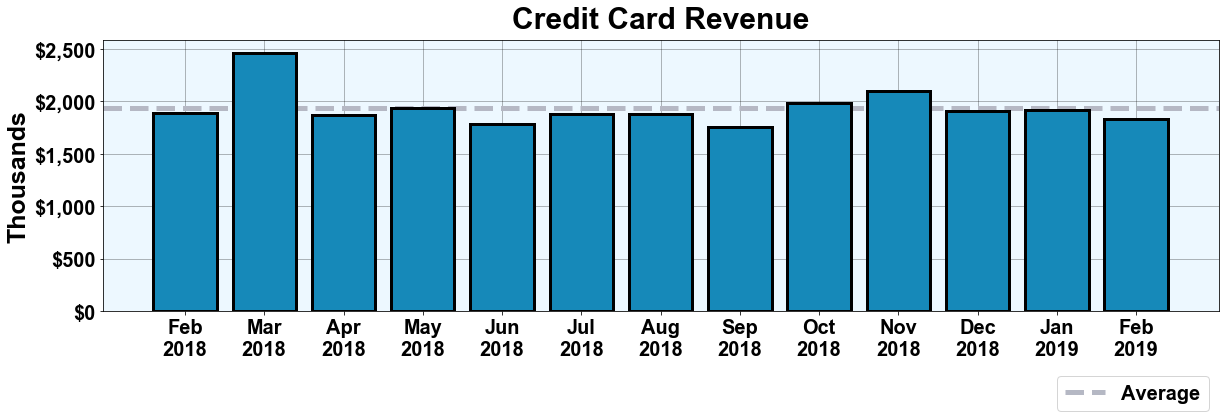

In [32]:
fig, ax = plt.subplots(figsize = (20,5))

x = np.arange(len(r_by_month))
y1 = r_by_month['csv total']

mean = y1.mean()

ax.axhline(mean, color = colors[4], ls = '--')

ax.bar(x, y1, color = colors[1], edgecolor = 'black', lw = 3, zorder = 5)
ax.set_yticklabels(['${:,.0f}'.format(x/1000) for x in ax.get_yticks()])
ax.set_ylabel('Thousands')
ax.set_xticks(x)
ax.set_xticklabels(pretty_dates)
ax.set_title('Credit Card Revenue', y = 1.02)
ax.set_facecolor(colors[5])
ax.grid(color = 'black', alpha = 0.35, zorder = 0)
ax.legend(['Average'], bbox_to_anchor = (1, -0.2)) 

plt.savefig(image_path + ax.get_title(), bbox_inches = 'tight')
plt.show()

# Counts and Fees
* NOTE: most of these counts will exactly match Authorize.net > Account > Statements, but some will be off by a few

In [33]:
c1 = audit_main.groupby(['year and month settlement','transaction status'])[['transaction id']].count().unstack()
c1.columns = c1.columns.droplevel(0)
c1['total count'] = c1.sum(1)

c1 = c1.join(audit_main.groupby(['year and month settlement'])[['transaction fee']].sum())

grav = pd.DataFrame(list(gravity_fees.items()), columns = ['year and month','gravity fee'])
grav.set_index('year and month', inplace = True)
c1 = c1.join(grav)

c1['total fee'] = c1[['transaction fee','gravity fee']].sum(1)
c1['fee as % of revenue'] = c1['total fee'].div(r_by_month['csv total'].values)

for_avg = ot.groupby('year and month purchased')[['orders id']].count()
for_avg = for_avg[(for_avg.index >= date_start[:7]) & (for_avg.index <= date_end[:7])]

c1['aov'] = r_by_month['csv total'].div(for_avg['orders id'], axis = 0)

fmt = ['n0','n0','n0','n0','n0','n0','n0','m0','m0','m0','p1','m0']

m = jb_mean(c1, fmt)
y = jb_yoy(c1)

display(m.join(y))
c1.format_(fmt).replace(['nan%','nan'],'')

,mean,yoy
Credited,122,101.16%
Declined,"1,619",-19.08%
Expired,126,-17.69%
General Error,17,-14.29%
Settled Successfully,"14,136",-4.64%
Voided,"2,137",-30.49%
Total Count,"18,156",-9.38%
Transaction Fee,"$1,520",-72.81%
Gravity Fee,"$43,356",0.30%
Total Fee,"$44,876",-2.79%


,Credited,Declined,Expired,General Error,Settled Successfully,Voided,Total Count,Transaction Fee,Gravity Fee,Total Fee,Fee As % Of Revenue,AOV
year and month settlement,,,,,,,,,,,,
2018-02,86,"1,887",130,7,"13,807","2,627","18,544","$1,854","$41,925","$43,779",2.3%,$134
2018-03,106,"2,357",139,21,"19,821","2,973","25,417","$2,542","$54,524","$57,066",2.3%,$126
2018-04,108,"1,686",182,5,"13,772","1,991","17,744","$1,774","$41,729","$43,503",2.3%,$130
2018-05,86,"1,468",147,2,"12,739","2,253","16,695","$1,669","$43,243","$44,912",2.3%,$146
2018-06,73,"1,219",155,9,"11,437","1,796","14,689","$1,469","$40,589","$42,058",2.4%,$154
2018-07,75,"1,566",87,142,"14,870","1,803","18,543","$1,854","$42,123","$43,977",2.3%,$120
2018-08,96,"1,356",107,2,"12,193","1,758","15,512","$1,551","$43,263","$44,814",2.4%,$152
2018-09,67,"1,529",115,7,"13,344","2,092","17,154","$1,715","$40,035","$41,750",2.4%,$118
2018-10,163,"1,476",116,4,"13,996","1,789","17,544","$1,754","$43,304","$45,058",2.3%,$147


### For report: counts and AOV

In [34]:
a = c1.iloc[-1]['total count']
b = c1.iloc[0]['total count']
c = a/b-1

w1 = 'The number of transactions {} {:,.1f}% year over year, {} from x{:,.0f} to x{:,.0f}.'.format('decreased' if c < 0 else 'increased',
                                                                                               np.abs(c) * 100,
                                                                                               'down' if c < 0 else 'up',
                                                                                               b,
                                                                                               a)

a = c1.iloc[-1]['aov']
b = c1.iloc[0]['aov']
c = a/b-1

w2 = 'The average order value (AOV) {} {:,.1f}%, {} from ${:,.0f} to ${:,.0f}.'.format('decreased' if c < 0 else 'increased',
                                                                                       np.abs(c) * 100,
                                                                                       'down' if c < 0 else 'up',
                                                                                       b,
                                                                                       a)

w3 = 'Check out the chart below which shows the order count and AOV over time.'

write = ' '.join([w1,w2,w3])
report_dict['order count and aov write'] = write
report_dict['order count and aov write']

'The number of transactions decreased 9.4% year over year, down from x18,544 to x16,805. The average order value (AOV) increased 0.5%, up from $134 to $135. Check out the chart below which shows the order count and AOV over time.'

### For report: fees

In [35]:
a = c1.iloc[-1]['total fee']
b = c1.iloc[-1]['fee as % of revenue']
c = c1['fee as % of revenue'].mean()

if np.abs(b-c) < 0.01:
    res = 'in-line with'
else:
    if b < c:
        res = 'below'
    else:
        res = 'above'

w1 = 'The combined Gravity and Authorize.net fee amount was ${:,.0f}, or {:,.1f}% of total revenue, {} the average proportion of {:,.1f}%.'.format(a,
                                                                                                                                                b * 100,
                                                                                                                                                res,
                                                                                                                                                c * 100)
report_dict['fees write'] = w1
report_dict['fees write']

'The combined Gravity and Authorize.net fee amount was $42,556, or 2.3% of total revenue, in-line with the average proportion of 2.3%.'

### Estimated Savings per month after renegotiation (DEFUNCT - Rep changed the structure of savings)

In [36]:
# k:[current amount, 1st negotiated amount, 2nd negotiated amount]
fees = {'updater fee':[0.25,0.02,0.25],
        'transaction fee':[0.10,0.05,0.03],
        'gravity fee':[0.0009,0.0007,0.0006]}

updater_counts = [1131.0,
                  1108.0,
                  1172.0,
                  1185.0]

updater_ls = []
for v in fees['updater fee']:
    updater_ls.append([v * x for x in updater_counts])
updater = pd.DataFrame(updater_ls).T 
    
transaction_counts = c1.iloc[-4:]['total count'].tolist()
transaction_ls = []
for v in fees['transaction fee']:
    transaction_ls.append([v * x for x in transaction_counts])
transaction = pd.DataFrame(transaction_ls).T
    
grav_rev = r_by_month.iloc[-4:]['csv total'].tolist()    
grav_ls = []
for v in fees['gravity fee']:
    grav_ls.append([v * x for x in grav_rev])
grav = pd.DataFrame(grav_ls).T

In [37]:
together = updater + transaction + grav
together.columns = ['original','first neg','second neg']
together['savings between second and first'] = together['first neg'] - together['second neg']

fmt = ['m0','m0','m0','m0']
jb_conf(together).loc[:'upper'].format_(fmt)

,Original,First Neg,Second Neg,Savings Between Second And First
lower,"$3,516","$2,080","$1,854",$221
mean,"$3,887","$2,308","$2,007",$301
upper,"$4,258","$2,535","$2,160",$380


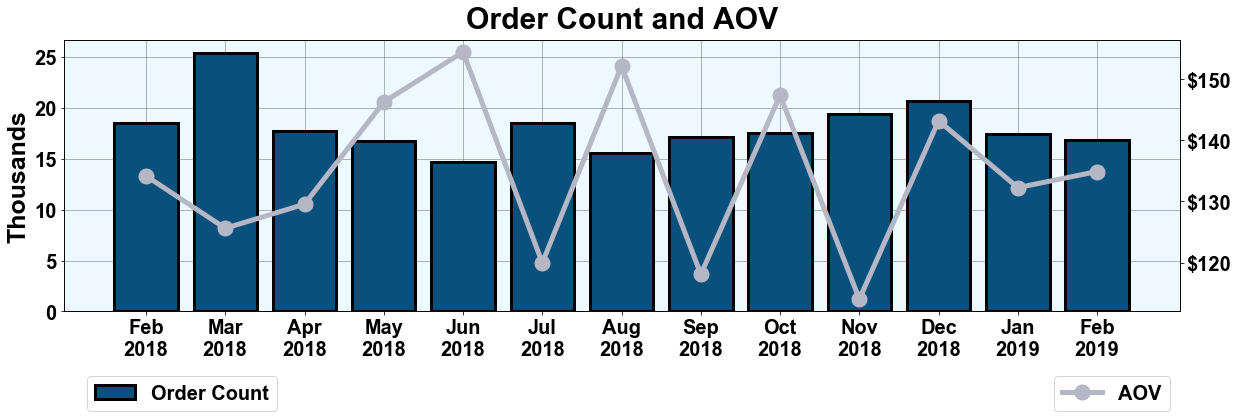

In [38]:
fig, ax = plt.subplots(figsize = (20,5))

x = np.arange(len(c1))
y1 = c1['total count']
y2 = c1['aov']

ax.bar(x, y1, color = colors[2], lw = 3, zorder = 5, edgecolor = 'black')
ax.set_yticklabels(['{:,.0f}'.format(x/1000) for x in ax.get_yticks()])
ax.set_ylabel('Thousands')
ax.set_title('Order Count and AOV', y = 1.02)
ax.set_facecolor(colors[5])
ax.legend(['Order Count'], bbox_to_anchor = (0.2, -0.2))
ax.grid(color = 'black', alpha = 0.35, zorder = 0)

ax2 = ax.twinx()
ax2.plot(x, y2, color = colors[4], marker = 'o', mew = 10)
ax2.set_yticklabels(['${:,.0f}'.format(x) for x in ax2.get_yticks()])
ax2.legend(['AOV'], bbox_to_anchor = (1, -0.2))

ax.set_xticks(x)
ax.set_xticklabels(pretty_dates)

plt.savefig(image_path + ax.get_title(), bbox_inches = 'tight')
plt.show()

# Approval Percentage
From email with subject line "Quick question on benchmarks from Adafruit Industries"

If you are attempting to take a transaction download and calculate it into an approval percentage there are a few steps. 

 

1.       Count all Response Code 1 transactions =COUNTIF(Range,"1")

2.       Count then Minus all Action Code “void” and “Expired” transactions from the previous steps results =COUNTIF(Range,"Void") , =COUNTIF(Range,"Expired")

3.       Count all “2” transactions =COUNTIF(Range,"2")

4.       Add the totals from step 2 and 3 to get the total transaction count

5.       Divide step 3 by step 4 to get the decline percentage

6.       1 minus step 5 results should give you the approval percentage listed in Transaction Statistics



In [39]:
app = audit_main.groupby(['year and month settlement','response code str'])[['transaction id']].count().unstack(1).fillna(0)
app.columns = app.columns.droplevel(0)
app['total count'] = app.sum(1)
app['approval %'] = app['approved']/app['total count']

fmt = ['n0','n0','n0','n0','p1']

m = jb_mean(app, fmt)
y = jb_yoy(app)

display(m.join(y))
app.format_(fmt).replace('nan%','')

,mean,yoy
Approved,"14,266",-4.75%
Declined,"1,558",-15.52%
Error,10,
Total Count,"15,833",-5.96%
Approval %,90.1%,1.29%


,Approved,Declined,Error,Total Count,Approval %
year and month settlement,,,,,
2018-02,"13,938","1,765",0,"15,703",88.8%
2018-03,"19,959","2,253",1,"22,213",89.9%
2018-04,"13,953","1,613",0,"15,566",89.6%
2018-05,"12,895","1,412",0,"14,307",90.1%
2018-06,"11,594","1,185",0,"12,779",90.7%
2018-07,"14,967","1,494",126,"16,587",90.2%
2018-08,"12,302","1,305",0,"13,607",90.4%
2018-09,"13,463","1,489",0,"14,952",90.0%
2018-10,"14,114","1,441",0,"15,555",90.7%


### For report

In [40]:
a = app.iloc[-1]['approval %']
b = app['approval %'].mean()

if np.abs(a - b) < 0.02:
    res = 'about equal to'
else:
    if a < b:
        res = 'below'
    else:
        res = 'above'
    
w1 = 'The approval percentage reached {:,.1f}%, {} the average of {:,.1f}%, as shown in the chart below.'.format(a * 100,
                                                                                                                 res,
                                                                                                                 b * 100)
report_dict['approval percentage write'] = w1
report_dict['approval percentage write']

'The approval percentage reached 89.9%, about equal to the average of 90.1%, as shown in the chart below.'

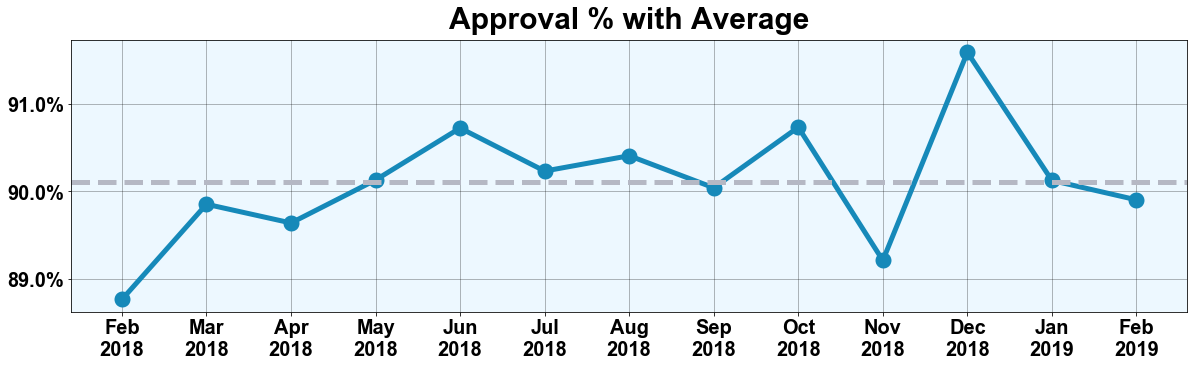

In [41]:
fig, ax = plt.subplots(figsize = (20,5))

x = np.arange(len(app))
y1 = app['approval %']

ax.plot(x, y1, color = colors[1], marker = 'o', mew = 10)
mean = y1.mean()

ax.axhline(mean, color = colors[4], ls = '--')
ax.set_yticklabels(['{:,.1f}%'.format(x*100) for x in ax.get_yticks()])
ax.set_xticks(x)
ax.set_xticklabels(pretty_dates)
ax.set_title('Approval % with Average', y = 1.02)
ax.set_facecolor(colors[5])
ax.grid(color = 'black', alpha = 0.35, zorder = 0)

plt.savefig(image_path + ax.get_title(), bbox_inches = 'tight')
plt.show()

# Refunds/Credits

In [42]:
cred_main = audit_main[audit_main['transaction type'] == 'credit'].copy()

n = cred_main[cred_main['orders id'].isnull()]
print('{:,.0f} OID nulls'.format(len(n)))
cred_main.dropna(subset = ['orders id'], inplace = True)

cred_main['invoice number'] = cred_main['transaction id'].map(dict(zip(csv_super_main['Transaction ID'], csv_super_main['Invoice Number'])))
cred_main['billing status name'] = cred_main['orders id'].map(dict(zip(ot['orders id'], ot['billing status name'])))

oids = cred_main['invoice number'].str.split('-', expand = True)[[0]]
oids.columns = ['orders id']
cred_main.drop('orders id',1,inplace = True)
cred_main = cred_main.join(oids, how = 'left')
cred_main['orders id'] = [int(x) for x in cred_main['orders id']]

cred = cred_main.groupby('year and month settlement').agg({'csv total':'sum','transaction id':'nunique'})
cred.rename(columns = {'csv total':'amount','transaction id':'oid count'}, inplace = True)
cred['avg per order'] = cred['amount']/cred['oid count']

fmt = ['m0','n0','m2']

m = jb_mean(cred, fmt)
y = jb_yoy(cred)

display(m.join(y))
cred.format_(fmt).replace('nan%','')

2 OID nulls


,mean,yoy
Amount,"$10,952",267.51%
OID Count,122,101.16%
Avg Per Order,$98.33,82.69%


,Amount,OID Count,Avg Per Order
year and month settlement,,,
2018-02,"$5,848",86,$68.00
2018-03,"$9,847",107,$92.03
2018-04,"$24,987",110,$227.15
2018-05,"$10,501",85,$123.54
2018-06,"$6,300",73,$86.30
2018-07,"$8,102",76,$106.61
2018-08,"$13,189",98,$134.59
2018-09,"$8,891",70,$127.02
2018-10,"$9,192",164,$56.05


### For report

In [43]:
a = cred.iloc[-1]['amount']
b = cred.iloc[0]['amount']
c = a/b-1

w1 = 'The total refund amount {} {:,.1f}% year over year, {} from ${:,.0f} to ${:,.0f}.'.format('decreased' if c < 0 else 'increased',
                                                                                               np.abs(c) * 100,
                                                                                              'down' if c < 0 else 'up',
                                                                                               b,
                                                                                               a)
a = int(cred.iloc[-1]['oid count'])
b = cred.iloc[-1]['avg per order']
c = cred.iloc[0]['avg per order']

if np.abs(a-b) < 1.50:
    res = 'about equal to'
else:
    if b < c:
        res = 'lower than'
    else:
        res = 'greater than'

w2 = 'There were x{} refunds issued for an average amount refunded of ${:,.2f}, {} last year\'s ${:,.2f}.'.format(a,
                                                                                                                  b,
                                                                                                                  res,
                                                                                                                  c)

report_dict['refunds write'] = ' '.join([w1,w2])
report_dict['refunds write']

"The total refund amount increased 267.5% year over year, up from $5,848 to $21,492. There were x173 refunds issued for an average amount refunded of $124.23, greater than last year's $68.00."

### OID nulls

In [44]:
print('total CSV amount of OID nulls: ${:,.2f}'.format(n['csv total'].sum()))
print('the count is {:,.0f}\n'.format(len(n)))

n_check1 = pd.read_sql(
'''
SELECT
COUNT(*) AS count
FROM authorizenet
WHERE transaction_id IN '''+ str(tuple(n['transaction id'].tolist())) +'''
''', db)

n_check2 = pd.read_sql(
'''
SELECT
COUNT(*) AS count
FROM authorizenet_zero
WHERE transaction_id IN '''+ str(tuple(n['transaction id'].tolist())) +'''
''', db)

print('double check that these OID nulls are NOT in the db')
tot = n_check1.values[0][0] + n_check2.values[0][0]
if tot == 0:
    print('TRUE: these OID nulls are truly not in the db')
else:
    raise ValueError('FALSE: one or more of these OID nulls are in the db')

total CSV amount of OID nulls: $1,546.62
the count is 2

double check that these OID nulls are NOT in the db
TRUE: these OID nulls are truly not in the db


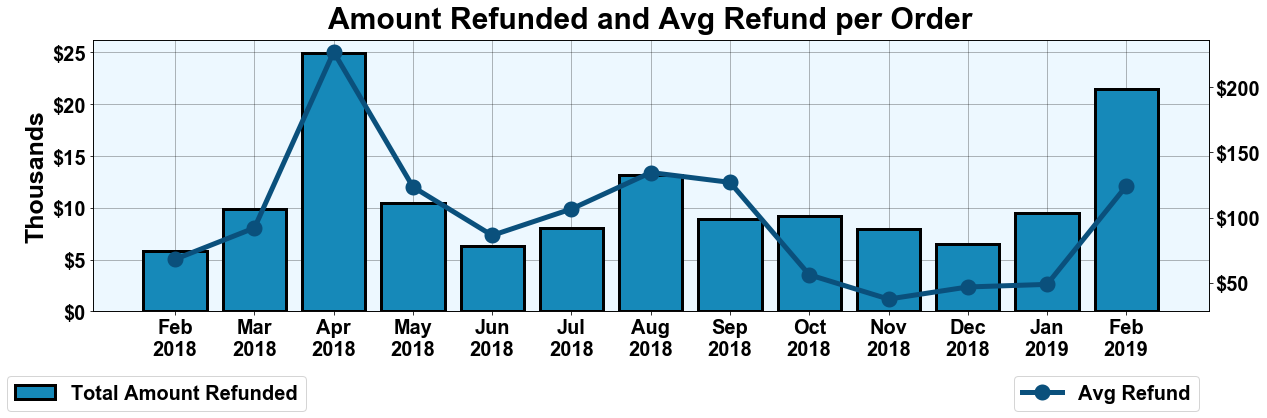

In [45]:
fig, ax = plt.subplots(figsize = (20,5))

x = np.arange(len(cred))
y1 = cred['amount']
y2 = cred['avg per order']

ax.bar(x, y1, color = colors[1], edgecolor = 'black', lw = 3, zorder = 5)
ax.set_yticklabels(['${:,.0f}'.format(x/1000) for x in ax.get_yticks()])
ax.set_ylabel('Thousands')
ax.set_title('Amount Refunded and Avg Refund per Order', y = 1.02)
ax.set_facecolor(colors[5])
ax.legend(['Total Amount Refunded'], bbox_to_anchor = (0.2, -0.2))
ax.grid(color = 'black', alpha = 0.35, zorder = 0)

ax2 = ax.twinx()
ax2.plot(x, y2, color = colors[2], marker = 'o', mew = 10)
ax2.legend(['Avg Refund'], bbox_to_anchor = (1, -0.2))
ax2.set_yticklabels(['${:,.0f}'.format(x) for x in ax2.get_yticks()])

ax.set_xticks(x)
ax.set_xticklabels(pretty_dates)

plt.savefig(image_path + ax.get_title(), bbox_inches = 'tight')
plt.show()

### Refunds of current month

In [46]:
ls = ['orders id','csv total','orders status name','billing status name']

cur_refunds = cred_main[cred_main['year and month settlement'] == date_end[:7]].sort_values('csv total', ascending = False)
cur_refunds = cur_refunds[ls]

print('total amount refunded: ${:,.0f}'.format(cur_refunds['csv total'].sum()))
cur_refunds.format_([0,'m2']).head()

total amount refunded: $21,492


,Orders Id,Csv Total,Orders Status Name,Billing Status Name
212451,1959718,"$5,259.34",Shipped,Payment Received
212450,1937364,"$5,111.74",Shipped,Payment Received
211570,1943417,"$2,472.89",Return,Refunded
211398,1946795,$865.94,Return,Refunded
212560,1956478,$543.37,Return,Refunded


### For report

In [47]:
oids = cur_refunds.iloc[:3]['orders id'].tolist()
totals = cur_refunds.iloc[:3]['csv total'].tolist()

link = 'https://volcano.adafruit.com/volcano/Order_Status.php?oid='

for i in range(3):
    report_dict['refund oid ' + str(i)] = str(oids[i])
    report_dict['refund link ' + str(i)] = link + str(oids[i])
    report_dict['refund amount ' + str(i)] = '${:,.0f}'.format(totals[i])

# Fraud
From Kelly in email with subject line "CSP Monthly Chargeback/Fraud Report":
* Fraud stopped
* Fraud - Void (orders_status = 15)


* Fraud not stopped
* Fraud - Confirmed (orders_status = 9)

In [48]:
osh_main = get_osh_data(date_start, date_end)


== osh_main start ==


== osh_main end ==



In [70]:
fraud_date_start = '2018-05-01' 

ls = ['fraud - void','fraud - confirmed'] # fraud stopped, fraud not stopped
f = osh_main[(osh_main['orders status name'].isin(ls))
           & (osh_main['date added'] >= fraud_date_start)].copy()

d = {ls[0]:'fraud stopped',
    ls[1]:'fraud not stopped'}

for k,v in d.items():
    f['orders status name'] = f['orders status name'].replace(k,v)

f2 = f.groupby(['year and month added','orders status name'])[['order subtotal']].sum().unstack(1).fillna(0)
f2.columns = f2.columns.droplevel(0)
f2['total fraud'] = f2.sum(1)
f2['stopped as % of total'] = f2['fraud stopped']/f2['total fraud']

fmt = ['m0','m0','m0','p1']

m = jb_mean(f2, fmt)
y = jb_yoy(f2)

display(m.join(y))
f2.format_(fmt)

,mean,yoy
Fraud Not Stopped,"$1,967",
Fraud Stopped,"$11,675",
Total Fraud,"$13,642",
Stopped As % Of Total,83.6%,


,Fraud Not Stopped,Fraud Stopped,Total Fraud,Stopped As % Of Total
year and month added,,,,
2018-05,"$5,938","$13,929","$19,867",70.1%
2018-06,"$1,508","$6,511","$8,019",81.2%
2018-07,"$3,664","$8,235","$11,899",69.2%
2018-08,"$1,024","$15,524","$16,548",93.8%
2018-09,$542,"$7,994","$8,535",93.7%
2018-10,"$1,535","$13,291","$14,826",89.6%
2018-11,"$1,720","$8,969","$10,689",83.9%
2018-12,"$1,240","$3,482","$4,722",73.7%
2019-01,"$1,394","$7,274","$8,669",83.9%


### For report

In [50]:
a = f2.iloc[-1]['fraud stopped']
b = f2.iloc[-1]['stopped as % of total']
c = f2['stopped as % of total'].mean()


w1 = 'The amount of fraud stopped was ${:,.0f}, which is {:,.1f}% of total monthly fraud, {} the average of {:,.1f}%.'.format(a,
                                                                                                                             b * 100,
                                                                                                                             'below' if b < c else 'above',
                                                                                                                             c * 100)
a = f2.iloc[-1]['fraud not stopped']
b = f2.iloc[-1]['total fraud']
c = f2['total fraud'].mean()
w2 = 'The amount of fraud not stopped was ${:,.0f}, which makes for a total fraud amount of ${:,.0f}, {} the average of ${:,.0f}.'.format(a,
                                                                                                                                         b,
                                                                                                                                         'below' if b < c else 'above',
                                                                                                                                         c)

w3 = 'Check out the chart below for fraud over time.'

write = ' '.join([w1,w2,w3])
report_dict['fraud write'] = write
report_dict['fraud write']

'The amount of fraud stopped was $31,542, which is 96.6% of total monthly fraud, above the average of 83.6%. The amount of fraud not stopped was $1,104, which makes for a total fraud amount of $32,647, above the average of $13,642. Check out the chart below for fraud over time.'

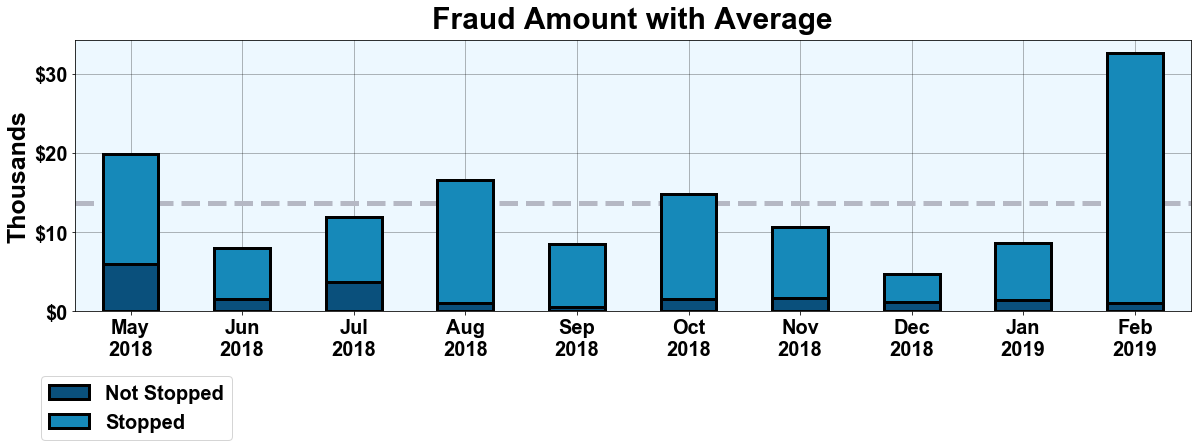

In [51]:
fig, ax = plt.subplots(figsize = (20,5))

f2[['fraud not stopped','fraud stopped']].plot(kind = 'bar',
                                               stacked = True,
                                               color = colors[1:3][::-1],
                                               ax = ax,
                                               edgecolor = 'black',
                                               lw = 3,
                                               zorder = 5)

ax.set_yticklabels(['${:,.0f}'.format(x/1000) for x in ax.get_yticks()])
ax.set_ylabel('Thousands')
ax.set_xlabel('')

l1 = list(f2.index)
l2 = []
for l in l1:
    m = calendar.month_abbr[int(l[-2:])]
    y = l[:4]
    res = m + '\n' + y
    l2.append(res)
    
ax.set_xticklabels(l2, rotation = 0)
ax.set_title('Fraud Amount with Average', y = 1.02)
ax.set_facecolor(colors[5])
ax.legend(['Not Stopped','Stopped'], bbox_to_anchor = (0.15,-0.2))
ax.grid(color = 'black', alpha = 0.35, zorder = 0)

total = f2[['fraud not stopped','fraud stopped']].sum(1)
mean = total.mean()
ax.axhline(mean, color = colors[4], ls = '--')

plt.savefig(image_path + ax.get_title(), bbox_inches = 'tight')
plt.show()

# Chargebacks

In [52]:
cb = osh_main[(osh_main['admin comments'].str.contains('char', case = False))
             & (osh_main['orders status name'] == 'fraud - confirmed')].copy()

min_oid = cb['orders id'].min()

orders_main = pd.read_sql(
'''
SELECT
DATE(date_purchased) AS date_purchased,
orders_id,
LOWER(payment_method) AS payment_method,
order_total
FROM orders
WHERE orders_id >= '''+ str(min_oid) +'''
''', db)

col_fix(orders_main)
orders_main['date purchased'] = pd.to_datetime(orders_main['date purchased'])

cols = orders_main.columns.tolist()
cols.remove('orders id')

for c in cols:
    cb[c] = cb['orders id'].map(dict(zip(orders_main['orders id'], orders_main[c])))

### Chargebacks by month

In [53]:
by_month = cb.groupby(['year and month added','payment method'])[['order total']].sum().unstack(1).fillna(0)
by_month.columns = by_month.columns.droplevel(0)
by_month['total amount'] = by_month.sum(1)

fmt = ['m0','m0','m0','m0']

m = jb_mean(by_month, fmt)
y = jb_yoy(by_month)
display(m.join(y))
by_month.format_(fmt)

,mean,yoy
Amazon Payments,$74,
Credit Card,$900,
Paypal,$5,
Total Amount,$979,


,Amazon Payments,Credit Card,Paypal,Total Amount
year and month added,,,,
2018-02,$707,$0,$0,$707
2018-03,$0,"$2,552",$0,"$2,552"
2018-04,$0,$223,$0,$223
2018-05,$0,$974,$0,$974
2018-06,$0,$834,$0,$834
2018-07,$0,"$1,764",$0,"$1,764"
2018-08,$0,$816,$0,$816
2018-09,$0,$167,$0,$167
2018-10,$42,"$1,124",$56,"$1,222"


# Payment methods by count

In [54]:
pay = pd.read_sql(
'''
SELECT
DATE_FORMAT(date_purchased, '%Y-%m') AS year_and_month,
payment_method
FROM orders
WHERE DATE(date_purchased) BETWEEN ' '''+ date_start +''' ' AND ' '''+ date_end +''' '
AND orders_status NOT IN (9,11,12,13,14,15)
''', db)

col_fix(pay)

In [55]:
pay['payment method'] = np.where(pay['payment method'].str.contains('Purchase Order'), 'Purchase Order', pay['payment method'])

pay2 = pay.groupby(['year and month','payment method'])[['payment method']].count().unstack(1).fillna(0)
pay2.columns = pay2.columns.get_level_values(1)
pay2.sort_values(pay2.index[-1], 
                 ascending = False, 
                 axis = 1,
                 inplace = True)

pay3 = pay2.iloc[[-1]].T

### For report

In [56]:
rank = pay3.index.get_loc('Credit Card') + 1

if rank == 1:
    ret = 'first'
elif rank == 2:
    ret = 'second'
elif rank == 3:
    ret = 'third'
elif rank == 4:
    ret = 'fourth'
elif rank == 5:
    ret = 'fifth'    
    
report_dict['rank'] = ret

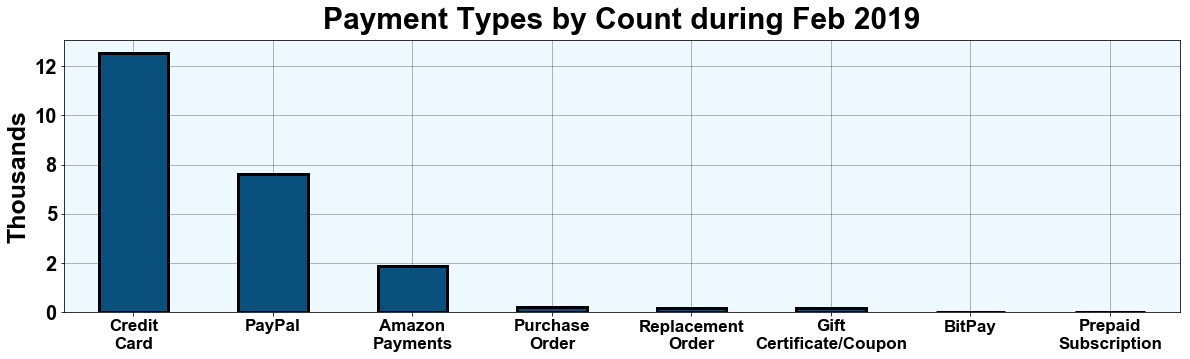

In [57]:
fig, ax = plt.subplots(figsize = (20,5))

xticks = pay3.index
xticks = [x.replace(' ','\n') for x in xticks]

d = date_end
m = calendar.month_abbr[int(d[5:7])]
y = d[:4]
d2 = m + ' ' + y

pay3.plot(kind = 'bar', ax = ax, edgecolor = 'black', color = colors[2], lw = 3, zorder = 5)

ax.set_yticklabels(['{:,.0f}'.format(x/1000) for x in ax.get_yticks()])
ax.set_ylabel('Thousands')
ax.set_xticklabels(xticks, rotation = 0, fontsize = 17)
ax.set_xlabel('')
ax.set_title('Payment Types by Count during %s' % d2, y = 1.02)
ax.set_facecolor(colors[5])
ax.legend().set_visible(False)
ax.grid(color = 'black', alpha = 0.35, zorder = 0)

plt.savefig(image_path + ax.get_title()[:22], bbox_inches = 'tight')
plt.show()

### PDF report

In [58]:
year_and_month = calendar.month_abbr[int(date_end[5:7])] + ' ' + date_end[:4]
report_title = date_end[:4] + ' - ' + date_end[5:7] + ' - ' + calendar.month_abbr[int(date_end[5:7])] + ' - Authorize.net and Gravity Monthly Audit'

In [67]:
a = r_by_month['ot total'].pct_change(periods = 12).iloc[-1]
b = r_by_month.iloc[-1]['cc as % total']

w1 = 'Credit card revenue was {} {:,.0f}% year over year and constituted {:,.0f}% of total revenue;'.format('down' if a < 0 else 'up',
                                                                                                            np.abs(a) * 100,
                                                                                                            b * 100)

a = c1['aov'].pct_change(periods = 12).iloc[-1]
w2 = 'the AOV {} {:,.0f}% year over year;'.format('increased' if a > 0 else 'decreased',
                                                 a * 100)

a = c1.iloc[-1]['fee as % of revenue']
b = c1['fee as % of revenue'].mean()

if np.abs(a-b) < 0.01:
    res = 'in-line with'
else:
    if a < b:
        res = 'below'
    else:
        res = 'above'

w3 = 'fees were {} the average;'.format(res)

a = app.iloc[-1]['approval %']
b = app['approval %'].mean()

if np.abs(a-b) < 0.02:
    res = 'in-line with'
else:
    if a < b:
        res = 'below'
    else:
        res = 'above'
        
w4 = 'approval percentage was {} the average;'.format(res)

a = cred.iloc[-1]['avg per order']
b = cred.iloc[0]['avg per order']
c = a/b-1

w5 = 'the average refund per order {} {:,.0f}% year over year;'.format('decreased' if c < 0 else 'increased',
                                                                      np.abs(c) * 100)

a = f2.iloc[-1]['stopped as % of total']
w6 = 'the amount of fraud stopped was {:,.0f}% of total fraud committed.'.format(a * 100)

write = ' '.join([w1,w2,w3,w4,w5,w6])
report_dict['summary'] = write
report_dict['summary']

'Credit card revenue was down 3% year over year and constituted 50% of total revenue; the AOV increased 1% year over year; fees were in-line with the average; approval percentage was in-line with the average; the average refund per order increased 83% year over year; the amount of fraud stopped was 97% of total fraud committed.'

In [68]:
if write_pdf == 'yes':
    
    from jinja2 import Environment, FileSystemLoader
    env = Environment(loader = FileSystemLoader(html_path))

    template = env.get_template(html_title)

    template_vars = {'year_and_month':year_and_month,
                     'now':now_pretty,
                     'summary':report_dict['summary'],
                     'revenue_write':report_dict['revenue write'],
                     'order_count_and_aov_write':report_dict['order count and aov write'],
                     'fees_write':report_dict['fees write'],
                     'approval_percentage_write':report_dict['approval percentage write'],
                     'refunds_write':report_dict['refunds write'],
                     
                     'refund_link_0':report_dict['refund link 0'],
                     'refund_link_1':report_dict['refund link 1'],
                     'refund_link_2':report_dict['refund link 2'],
                    
                     'refund_oid_0':report_dict['refund oid 0'],
                     'refund_oid_1':report_dict['refund oid 1'],
                     'refund_oid_2':report_dict['refund oid 2'],
                    
                     'refund_amount_0':report_dict['refund amount 0'],
                     'refund_amount_1':report_dict['refund amount 1'],
                     'refund_amount_2':report_dict['refund amount 2'],
                    
                     'fraud_write':report_dict['fraud write'],
                     'rank':report_dict['rank']}

    html_out = template.render(template_vars)

    from weasyprint import HTML

    HTML(string = html_out).write_pdf(pdf_path + report_title + '.pdf',
                                      stylesheets = [style_sheet_path])                               

In [69]:
print('done')

done
